<a href="https://colab.research.google.com/github/chistachill/MathCode2024/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 7 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [ ]:
import pandas as pd
%matplotlib inline

**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
# Your code here
import pandas as pd
df =pd.read_csv('2008.csv')
df


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [ ]:
# Your code here
import pandas as pd
df =pd.read_csv('2008.csv')
df


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [ ]:
# Your code here
codes = df["CancellationCode"]
codes.value_counts()

#Выводится А, то есть carrier


CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [ ]:
# Your code here
rasst = df["Distance"]
print("Максимальное расстояние: ", rasst.max())
print( "Среднее расстояние: ", rasst.mean())
print( "Минимальное расстояние", rasst.min())

Максимальное расстояние:  4962
Среднее расстояние:  724.5082571428571
Минимальное расстояние 31


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:
# Your code here
date_fnum_ucarrier = ["Year", "Month", "DayofMonth", "FlightNum", "UniqueCarrier"]
fnum_ucarrier_dist = ["FlightNum", "UniqueCarrier", "Distance"]
days = df[rasst == rasst.min()][date_fnum_ucarrier].drop_duplicates()
print(days)
flights = df[rasst == rasst.min()][["FlightNum", "UniqueCarrier"]].drop_duplicates()
get_other_flights = lambda flight: \
    np.logical_and(df["FlightNum"] == flight[0], df["UniqueCarrier"] == flight[1])
[df[get_other_flights(flight)][fnum_ucarrier_dist].drop_duplicates() for flight in flights.values]

       Year  Month  DayofMonth  FlightNum UniqueCarrier
1116   2008     12          30         65            AS
6958   2008     12          26         65            AS
17349  2008      8          18         64            AS
27534  2008      3          11         64            AS
46082  2008      8           9         65            AS
48112  2008      2          28         64            AS


[       FlightNum UniqueCarrier  Distance
 1116          65            AS        31
 1517          65            AS       680
 6326          65            AS        82
 10113         65            AS       571
 43132         65            AS       123,
        FlightNum UniqueCarrier  Distance
 1389          64            AS       680
 3869          64            AS        82
 4466          64            AS       123
 17349         64            AS        31
 43353         64            AS       571]

**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [ ]:
# Your code here
best_airport = df["Origin"].value_counts().index[0]
print(best_airport)

#Найдем в интернете, какому городу принадлежит ATL
print('Международный аэропорт Хартсфилд-Джексон (Атланта) — гражданский аэропорт США, расположенный в штате Джорджия.')

ATL
Международный аэропорт Хартсфилд-Джексон (Атланта) — гражданский аэропорт США, расположенный в штате Джорджия.


**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [ ]:
# Your code here


mean_time = df.groupby("Origin")["AirTime"].aggregate(np.mean)
airport_max = mean_time.idxmax()
print(airport_max,mean_time.max())

SJU 205.2


**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [54]:
df = pd.read_csv('2008.csv')
flightsmore1000 = df.groupby('Origin').filter(lambda x: len(x) >= 1000)
delay_flights = flightsmore1000[flightsmore1000['DepDelay']>0]
max_delay_airport = (delay_flights.groupby('Origin').size()/flightsmore1000.groupby('Origin').size()).idxmax()
print(max_delay_airport)


EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [55]:
# Your code here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

df = pd.read_csv('2008.csv')
#Общее количество пропусков
df.isnull().sum().sum ()

#Количество признаков
df.isnull().any(axis=0).sum ()
#Хотя бы один пропуск


355215

In [57]:
#Количество объектов
df.isnull().any(axis=1).sum()



70000

In [56]:
#Количество признаков
df.isnull().any(axis=0).sum()



16

In [58]:
#Хотя бы 1 пропуск
df.isna().any().sum()

16

In [59]:
#Хотя бы 1 пропущенное значение
df.isna().sum().sum()

355215

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [61]:
#Количество поопущенных значений в DEPDelay
df['DepDelay'].isnull().sum()

1399

In [62]:
#Количество значений равных 0
(df['DepDelay']==0).sum()

5197

In [65]:
#Удалим все нулевые и пропущенные объекты
df_null = df.dropna(subset=['DepDelay']).loc[df['DepDelay'] != 0]

#Удалим пустые столбцы
df_null = df_null.drop(columns=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
df_null

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,-8.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,0
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,-12.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,0
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,22.0,24.0,ORD,GRR,137,4.0,13.0,0,NaN,0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,21.0,6.0,RSW,MSP,1416,20.0,22.0,0,NaN,0


**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [83]:
#Функция для разделения
df = pd.read_csv('2008.csv')
def extract_hour_minute(time):
    if pd.isnull(time):
        return pd.NA, pd.NA
    else:
        hour = int(time // 100)
        minute = int(time % 100)
        return hour, minute

# Преобразование каждого признака
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature in time_features:
    df[feature + '_Hour'], df[feature + '_Minute'] = zip(*df[feature].apply(extract_hour_minute))
    df = df.drop(columns=[feature])

# Вывод первых пяти строк обновленного DataFrame для проверки
print(df.head())

   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0  2008      6          18          3            WN        242  N699SW   
1  2008      6           4          3            XE       2380  N15980   
2  2008      8           3          7            WN       1769  N464WN   
3  2008      1          23          3            OO       3802  N465SW   
4  2008      5           4          7            WN        399  N489WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ...  SecurityDelay  \
0               57.0            65.0     46.0  ...            NaN   
1              124.0           138.0    108.0  ...            NaN   
2              138.0           155.0    125.0  ...            NaN   
3              102.0           111.0     79.0  ...            NaN   
4              148.0           160.0    136.0  ...            NaN   

   LateAircraftDelay DepTime_Hour DepTime_Minute  CRSDepTime_Hour  \
0                NaN           21             11               20   
1 

**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [84]:
df = df.drop(['TailNum', 'Year'], axis = 1)
#Удаляю ArrDelay, потому что очень большая корреляция с DepDelay
df = df.drop(['ArrDelay'], axis = 1)
df


,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,NaN,NaN,21,11,20,55,23,8,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,NaN,NaN,14,26,14,10,17,30,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,NaN,NaN,11,43,11,45,15,1,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,NaN,NaN,11,41,11,44,13,23,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,NaN,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,...,NaN,NaN,18,29,18,40,21,37,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,...,0.0,22.0,11,49,11,25,13,36,13,14
69997,9,24,3,YV,7058,80.0,80.0,63.0,0.0,DAY,...,NaN,NaN,10,12,10,12,11,32,11,32
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,...,0.0,6.0,19,6,19,0,22,0,21,39


**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

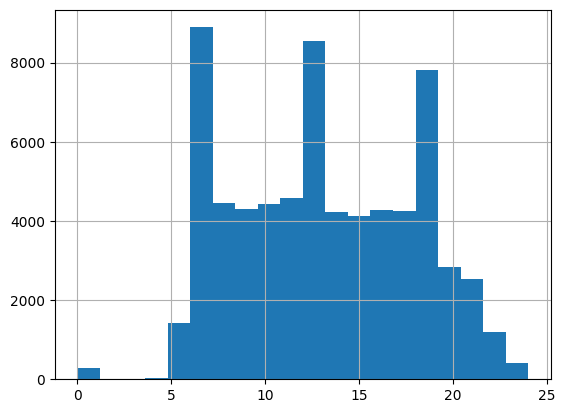

In [85]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

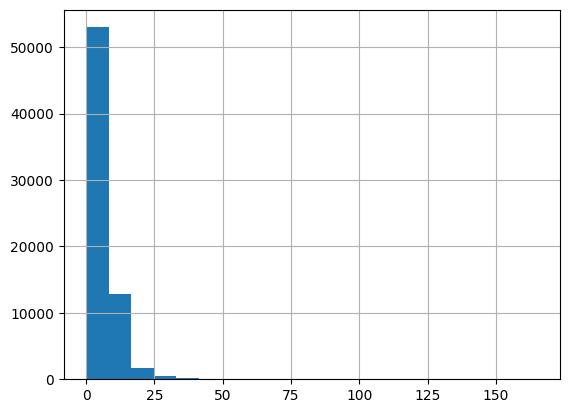

In [86]:
df['TaxiIn'].hist(bins=20)

<Axes: >

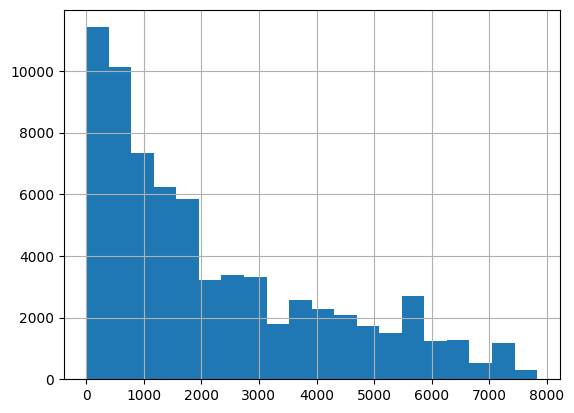

In [87]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Каждый график представляет собой абсолютно разные значения. То есть каждый признак имеет довольно большой разброс значений. Масштабирование должен их "причесать"

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [88]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def transform_data(df):
    # Создание копии DataFrame, чтобы не изменять исходные данные
    df_transformed = df.copy()

    # Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    df_transformed[numeric_cols] = df_transformed[numeric_cols].fillna(0)
    df_transformed[categorical_cols] = df_transformed[categorical_cols].fillna('nan')

    # Масштабирование вещественных признаков с помощью StandardScaler
    scaler = StandardScaler()
    df_transformed[numeric_cols] = scaler.fit_transform(df_transformed[numeric_cols])

    # One-hot-кодирование категориальных признаков с помощью pd.get_dummies
    df_transformed = pd.get_dummies(df_transformed, columns=categorical_cols)

    return df_transformed




Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [90]:
#Применяем функцию в фрейму
transformed_df = transform_data(df)
transformed_df

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,ArrTime_Minute_51,ArrTime_Minute_52,ArrTime_Minute_53,ArrTime_Minute_54,ArrTime_Minute_55,ArrTime_Minute_56,ArrTime_Minute_57,ArrTime_Minute_58,ArrTime_Minute_59,ArrTime_Minute_nan
0,-0.111232,0.256159,-0.463891,-1.004665,-0.930601,-0.912187,-0.805728,0.181158,-0.738324,-0.748794,...,False,False,False,False,False,False,False,False,False,False
1,-0.111232,-1.332282,-0.463891,0.084156,-0.001271,0.135521,0.096865,0.181158,0.193626,-0.546142,...,False,False,False,False,False,False,False,False,False,False
2,0.473737,-1.445742,1.540176,-0.227008,0.192918,0.379508,0.344350,-0.341343,0.481876,-0.546142,...,False,False,False,False,False,False,False,False,False,False
3,-1.573653,0.823459,-0.463891,0.808339,-0.306424,-0.251988,-0.325316,-0.370371,-0.340433,-0.546142,...,False,False,False,False,False,False,False,False,False,False
4,-0.403716,-1.332282,1.540176,-0.924709,0.331624,0.451269,0.504488,-0.428427,0.646338,-0.546142,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.403716,-0.424602,-1.465925,-0.723547,0.054212,0.006351,-0.223410,-0.602594,-0.209571,3.101581,...,False,False,False,False,False,False,False,False,False,False
69996,-0.403716,-0.538062,1.540176,2.008690,-1.069307,-1.141822,-1.038656,0.413381,-1.038953,-0.546142,...,False,False,False,False,False,False,False,False,False,False
69997,0.766221,0.936919,-0.463891,2.466524,-0.611577,-0.696905,-0.558243,-0.283287,-0.630451,0.061812,...,False,False,False,False,False,False,False,False,False,False
69998,-1.281169,0.256159,-1.465925,-0.801466,1.524496,1.298046,1.319734,-0.109120,1.222838,2.696279,...,False,False,False,False,False,False,False,False,False,False


In [92]:
len(transformed_df.columns)

816

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

ValueError: could not convert string to float: 'AA'

NameError: name 'y_new_train' is not defined

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

УРА КОНЕЦ ЛАБЫ!!!!!!!

Яков Михайлович, лабы классные, мне понравились, только очень очень сложные
Невозможно подсчитать количество потраченных нервов на тупых ошибках, но было интересно! Спасибо Вам за курс!!!!

In [110]:
print('Спасибо!Было круто!')

Спасибо!Было круто!
